In [1]:
%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'

curr_path = Popen(["ls"], stdout=PIPE, stderr=PIPE)
c_dir = Popen(["pwd"],stdout=PIPE, stderr=PIPE)
c_out, c_err = curr_path.communicate()
d_out, d_err = c_dir.communicate()
               
s = str(c_out.decode('utf-8')).splitlines()
print(d_out.decode('utf-8').rstrip())

data_labels = []
data_address = []
for i in s:
    if '.csv' in i:
        data_labels.append(i.strip('.csv'))
        data_address.append(d_out.decode('utf-8').rstrip()+'/'+i)


data_l = ['f', '1.5f', '0.5f', '0f']

data_arr = data_generator(data_address)

plot_generator(data_arr, 2, 4, 
               70, 45,
              0.95, 45, 45, 45, 'Beam Position Window (mm)','Irradiance (Watts/sqmm)',
              'Test of Veracity of Focal Definition in ZEMAX', data_l, 'doublecheck')

focal_l = 6200
step = np.divide(focal_l,2)

exp_x = np.arange(0,2*focal_l,step)
sigma_values = fit_parameter_extractor(gaussian, data_arr)
exp_waist = np.multiply(2, sigma_values[2])
print(exp_waist)

num_x = np.arange(0,2*focal_l, 0.01)
num_waist = lens_waist_size(num_x, 5, 600, 6200)

print(exp_waist)
print(exp_x)

exp_waist[0], exp_waist[3] = exp_waist[3], exp_waist[0]
exp_waist[3], exp_waist[2] = exp_waist[2], exp_waist[3]
print(exp_waist)

print('theory value waist at f:')
print(lens_waist_size(6200, 5, 600, 6200))
print('fit value waist at f (abs value):')
print(np.abs(np.amin(exp_waist)))

comp = plt.figure(figsize=(20,20))
c = comp.add_subplot(111)
c.plot(data_arr[1][0], data_arr[1][1], color = 'green', linestyle = ':', label = '.5f')
c.plot(data_arr[2][0], data_arr[2][1], color = 'red', linestyle = '-.', label = '1.5f')
c.set_xlabel('Position along Beam (mm)', fontsize=20)
c.set_ylabel('$W(z)$ (mm)', fontsize=20)
c.tick_params(axis='both', labelsize=20)
c.legend(loc = 'upper right')
comp.suptitle('test equi', fontsize=20)

comp.tight_layout()
comp.subplots_adjust(0.05)



s = plt.figure(figsize=(20,20))
s1 = s.add_subplot(111)
s1.scatter(exp_x, np.abs(exp_waist))
s1.plot(num_x, num_waist, linestyle = '-.', color = 'green')
s1.tick_params(axis='both', labelsize=20)
s1.set_xlabel('Position along Beam (mm)', fontsize=20)
s1.set_ylabel('$W(z)$ (mm)', fontsize=20)
s.suptitle('first try with ')
s.tight_layout()




/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/enrique_lensmaker


ValueError: max() arg is an empty sequence

In [ ]:
%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'

l2_fp = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/enrique_lensmaker/f1600/'

l2_0 = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/enrique_lensmaker/f1600/dataatstart.csv'
l2_05_f = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/enrique_lensmaker/f1600/dataatmidf.csv'
l2_f = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/enrique_lensmaker/f1600/dataatf.csv'
l2_1_5_f = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/enrique_lensmaker/f1600/dataat1midf.csv'

data_loc = [l2_0, l2_05_f, l2_f, l2_1_5_f]
data_labels = ['0f', '0.5f', '1', '1.5f']

l2_data = data_generator(data_loc)


plot_generator(l2_data, 2, 4, 
               70, 45,
              0.95, 45, 45, 45, 'Beam Position Window (mm)','Irradiance (Watts/sqmm)',
              'Test of Veracity of Focal Definition in ZEMAX f=1600', data_labels, 'doublecheckf1600')

#beam check 

f_length = 1600
step = np.divide(f_length, 2)

exp_x = np.arange(0, 2*f_length, step)
sigmas = fit_parameter_extractor(gaussian, l2_data)
exp_waist = np.multiply(2, sigmas[2])
print('fit waist:')
print(exp_waist)

num_x = np.arange(0,2*f_length, 0.01)
num_waist = lens_waist_size(num_x, 5, 600, 1600)
print('theory value for waist at focal point:')
print((lens_waist_size(1600, 5, 600, 1600)))

s = plt.figure(figsize=(20,20))
s1 = s.add_subplot(111)
s1.scatter(exp_x, np.abs(exp_waist))
s1.plot(num_x, num_waist, linestyle = '-.', color = 'green')
s1.tick_params(axis='both', labelsize=20)
s1.set_xlabel('Position along Beam (mm)', fontsize=20)
s1.set_ylabel('$W(z)$ (mm)', fontsize=20)
s.suptitle('first try with ')
s.tight_layout()




5.00000033331
2.48415427857
2.51337639468
2.50021181345


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

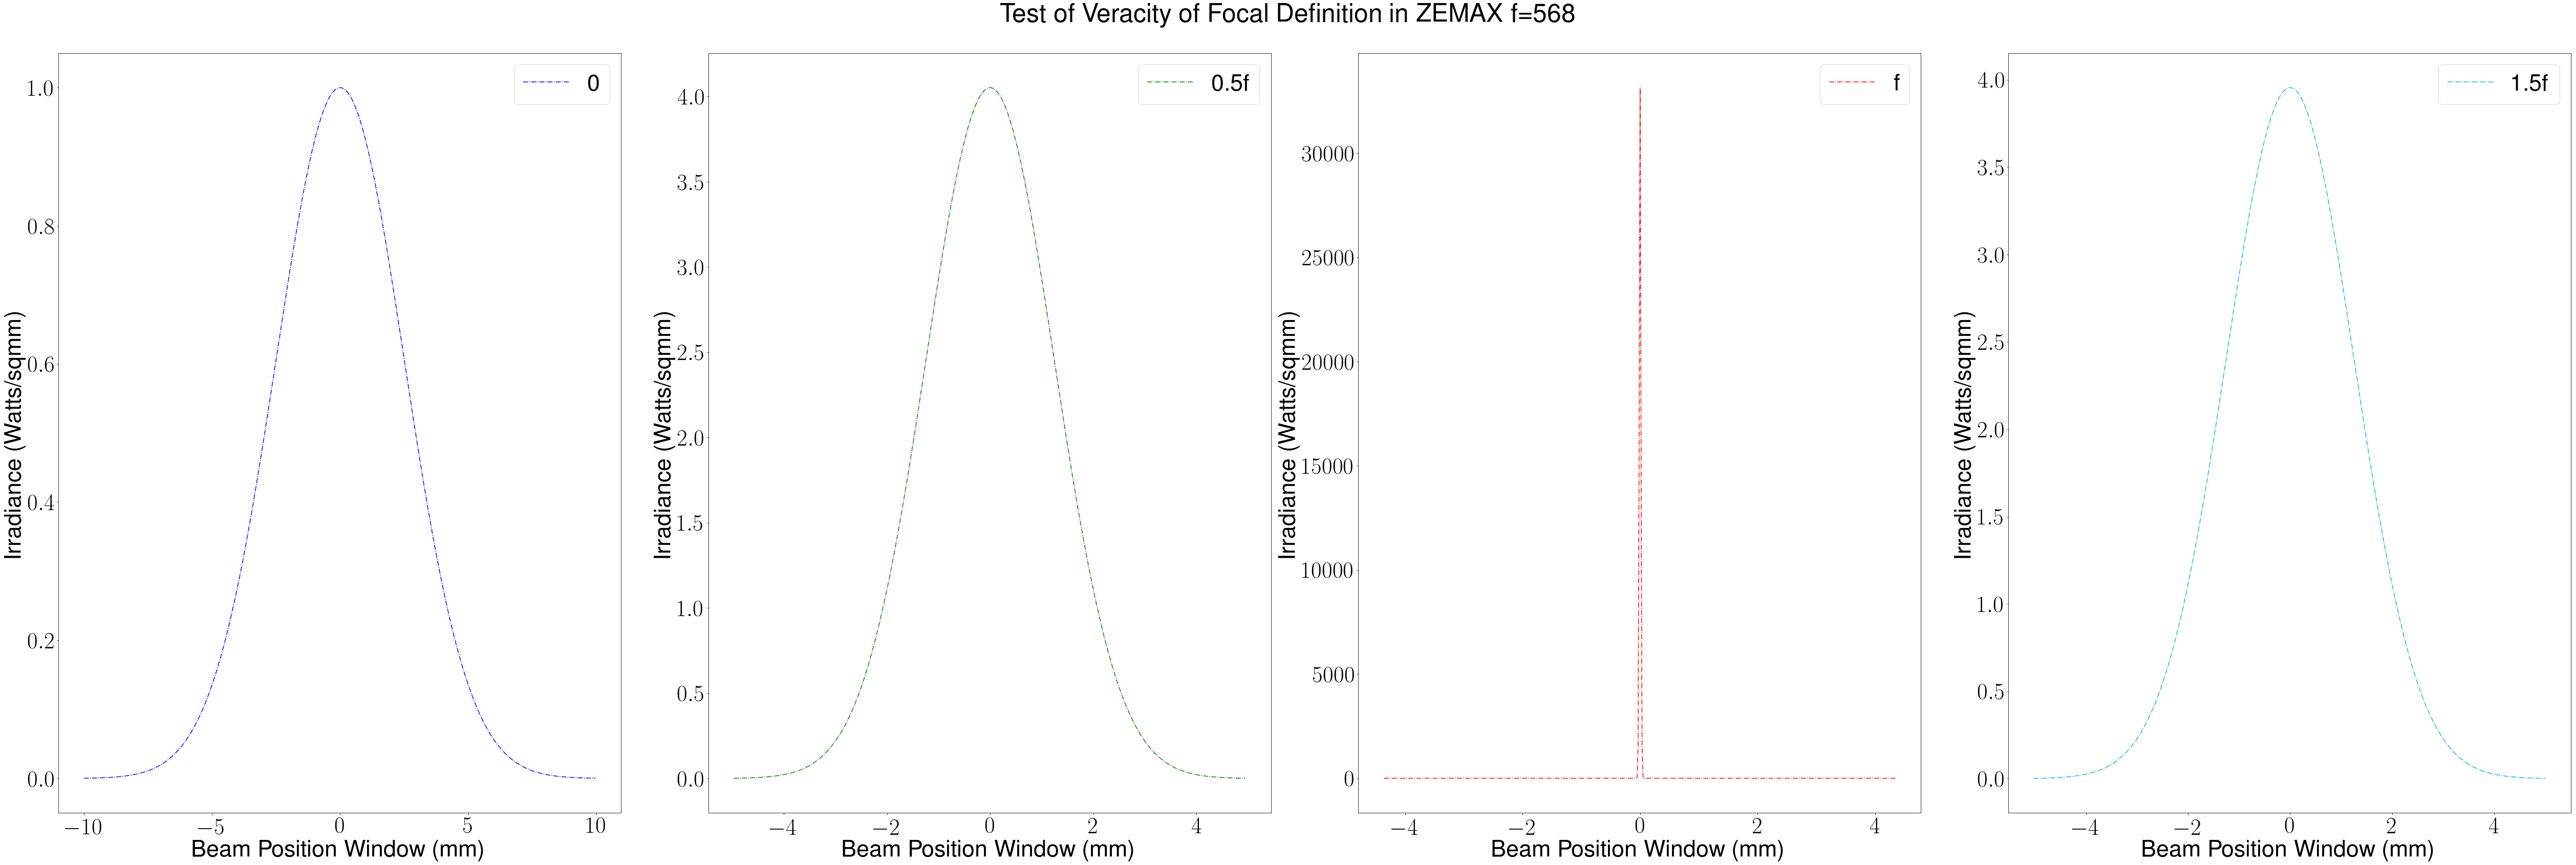

In [40]:
%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'

path = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/enrique_lensmaker/f568/'

l56_0 = path + 'dataatstart.csv'
l56_05_f = path + 'dataatmidf.csv'
l56_f = path + 'dataatf.csv'
l56_1_5_f = path + 'dataat1midf.csv'

files = [l56_0, l56_05_f, l56_f, l56_1_5_f]
dlabels = ['0', '0.5f', 'f', '1.5f']
data = data_generator(files)

plot_generator(data, 2, 4, 
               70, 45,
              0.95, 45, 45, 45, 'Beam Position Window (mm)','Irradiance (Watts/sqmm)',
              'Test of Veracity of Focal Definition in ZEMAX f=568', dlabels, 'doublecheckf568')

f_length = 568
step = np.divide(f_length, 2)

popt, pcov = curve_fit(gaussian, data[0][0], data[0][1])
print(2*popt[2])
popt, pcov = curve_fit(gaussian, data[1][0], data[1][1])
print(2*popt[2])
popt, pcov = curve_fit(gaussian, data[3][0], data[3][1])
print(2*popt[2])

print((lens_waist_size(1.5*f_length, 5, 600, 568)))
exp_x = np.arange(0, 2*f_length, step)
sigmas = fit_parameter_extractor(gaussian, data)
exp_waist = np.multiply(2, sigmas[2])

print(exp_waist)

num_x = np.arange(0,2*f_length, 0.01)
num_waist = lens_waist_size(num_x, 5, 600, 568)
print('theory value for waist at focal point:')
print((lens_waist_size(0, 5, 600, 568)))
print((lens_waist_size(step, 5, 600, 568)))
print((lens_waist_size(f_length, 5, 600, 568)))
print((lens_waist_size(1.5*f_length, 5, 600, 568)))




f = plt.figure(figsize=(20,20))
fd = f.add_subplot(111)
fd.plot(num_x, num_waist, linestyle = ':',color = 'red')
fd.scatter(exp_x, exp_waist, color = 'yellowgreen')